In [1]:
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.options.display.float_format = '{:.0f}'.format


In [2]:
travel_df = pd.read_excel('C:/Users/Bonghwan/Downloads/datalab (6).xlsx')

# df[4:]

# 세부여행	날짜	제주차박	날짜	사이판여행	날짜	제주여행
travel_df = travel_df[6:]

In [4]:
travel_df

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_bd68f1fc070ee8f20dab04eee113ef2a,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
6,2016-01-01,45.31551,2016-01-01,0.01788,2016-01-01,15.79648,2016-01-01,74.7292
7,2016-02-01,47.89426,2016-02-01,0.02981,2016-02-01,15.872,2016-02-01,85.0949
8,2016-03-01,47.81079,2016-03-01,0.03577,2016-03-01,28.74391,2016-03-01,96.44936
9,2016-04-01,55.59574,2016-04-01,0.03676,2016-04-01,14.60399,2016-04-01,88.75981
10,2016-05-01,64.46288,2016-05-01,0.06359,2016-05-01,23.21176,2016-05-01,91.22229
...,...,...,...,...,...,...,...,...
70,2021-05-01,2.02027,2021-05-01,2.81128,2021-05-01,3.02394,2021-05-01,64.602
71,2021-06-01,2.44459,2021-06-01,2.40087,2021-06-01,11.31769,2021-06-01,75.81933
72,2021-07-01,2.3015,2021-07-01,2.04114,2021-07-01,12.31243,2021-07-01,69.01321
73,2021-08-01,2.00735,2021-08-01,2.4913,2021-08-01,15.97138,2021-08-01,57.06548


In [5]:
travel_df.drop('Unnamed: 2', axis=1, inplace=True)
travel_df.drop('Unnamed: 4', axis=1, inplace=True)
travel_df.drop('Unnamed: 6', axis=1, inplace=True)


In [6]:
travel_df.rename(columns={'Unnamed: 3':'제주차박'}, inplace = True)
travel_df

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_bd68f1fc070ee8f20dab04eee113ef2a,제주차박,Unnamed: 5,Unnamed: 7
6,2016-01-01,45.31551,0.01788,15.79648,74.7292
7,2016-02-01,47.89426,0.02981,15.872,85.0949
8,2016-03-01,47.81079,0.03577,28.74391,96.44936
9,2016-04-01,55.59574,0.03676,14.60399,88.75981
10,2016-05-01,64.46288,0.06359,23.21176,91.22229
...,...,...,...,...,...
70,2021-05-01,2.02027,2.81128,3.02394,64.602
71,2021-06-01,2.44459,2.40087,11.31769,75.81933
72,2021-07-01,2.3015,2.04114,12.31243,69.01321
73,2021-08-01,2.00735,2.4913,15.97138,57.06548


In [7]:
travel_df.rename(columns={'url':'date', 'http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_bd68f1fc070ee8f20dab04eee113ef2a':'세부여행', 'Unnamed: 3	':'제주차박', 'Unnamed: 5':'사이판여행', 'Unnamed: 7':'제주여행'}, inplace= True)
travel_df

,date,세부여행,제주차박,사이판여행,제주여행
6,2016-01-01,45.31551,0.01788,15.79648,74.7292
7,2016-02-01,47.89426,0.02981,15.872,85.0949
8,2016-03-01,47.81079,0.03577,28.74391,96.44936
9,2016-04-01,55.59574,0.03676,14.60399,88.75981
10,2016-05-01,64.46288,0.06359,23.21176,91.22229
...,...,...,...,...,...
70,2021-05-01,2.02027,2.81128,3.02394,64.602
71,2021-06-01,2.44459,2.40087,11.31769,75.81933
72,2021-07-01,2.3015,2.04114,12.31243,69.01321
73,2021-08-01,2.00735,2.4913,15.97138,57.06548


In [8]:
from datetime import datetime
travel_df['date'] = travel_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
travel_df

,date,세부여행,제주차박,사이판여행,제주여행
6,2016-01-01,45.31551,0.01788,15.79648,74.7292
7,2016-02-01,47.89426,0.02981,15.872,85.0949
8,2016-03-01,47.81079,0.03577,28.74391,96.44936
9,2016-04-01,55.59574,0.03676,14.60399,88.75981
10,2016-05-01,64.46288,0.06359,23.21176,91.22229
...,...,...,...,...,...
70,2021-05-01,2.02027,2.81128,3.02394,64.602
71,2021-06-01,2.44459,2.40087,11.31769,75.81933
72,2021-07-01,2.3015,2.04114,12.31243,69.01321
73,2021-08-01,2.00735,2.4913,15.97138,57.06548


In [9]:
travel_df['세부여행'] = travel_df['세부여행'].apply(lambda x: float(x))
travel_df['제주차박'] = travel_df['제주차박'].apply(lambda x: float(x))
travel_df['사이판여행'] = travel_df['사이판여행'].apply(lambda x: float(x))
travel_df['제주여행'] = travel_df['제주여행'].apply(lambda x: float(x))

No handles with labels found to put in legend.


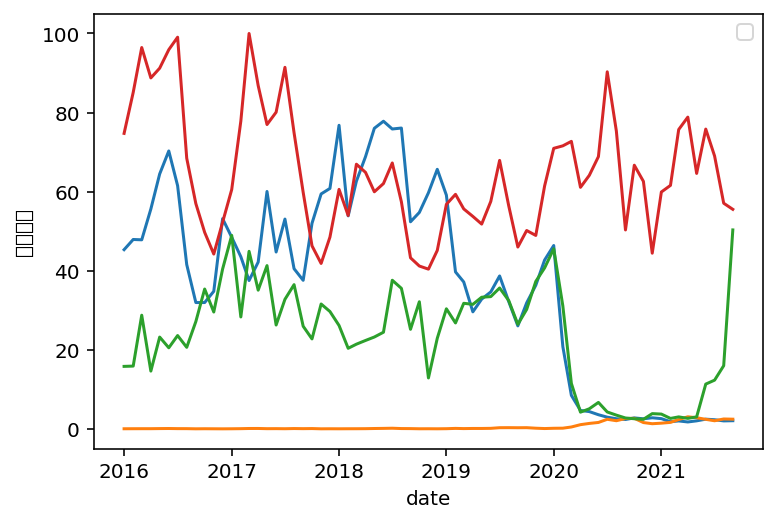

In [12]:
sns.lineplot(data = travel_df, x='date', y = '세부여행').set_label('세부여행')
sns.lineplot(data = travel_df, x='date', y = '제주차박').set_label('제주차박')
sns.lineplot(data = travel_df, x='date', y = '사이판여행').set_label('사이판여행')
sns.lineplot(data = travel_df, x='date', y = '제주여행').set_label('제주여행')
plt.legend()

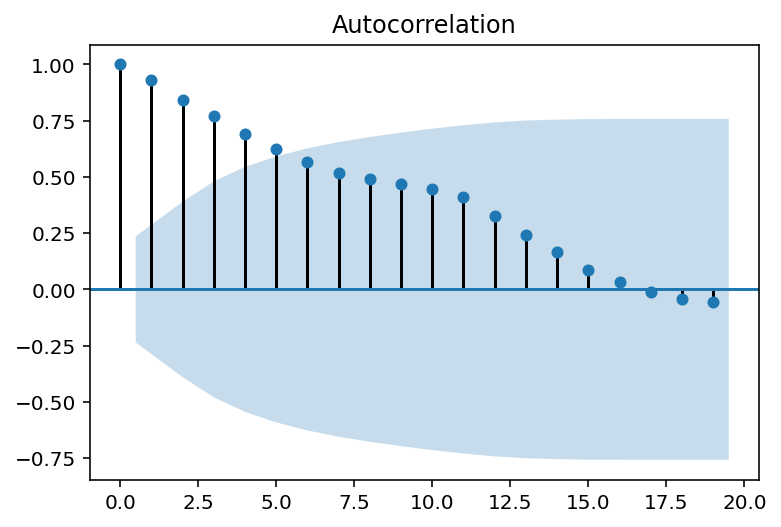

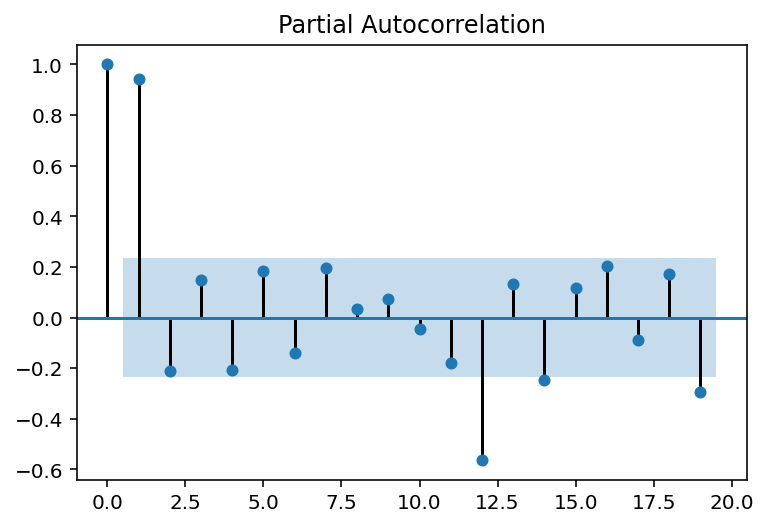

In [14]:

plot_acf(travel_df['제주차박'])
plot_pacf(travel_df['제주차박'])
plt.show()


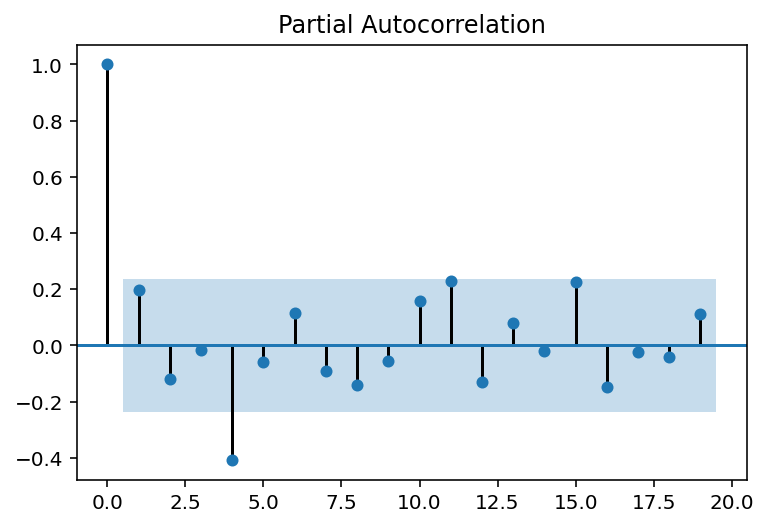

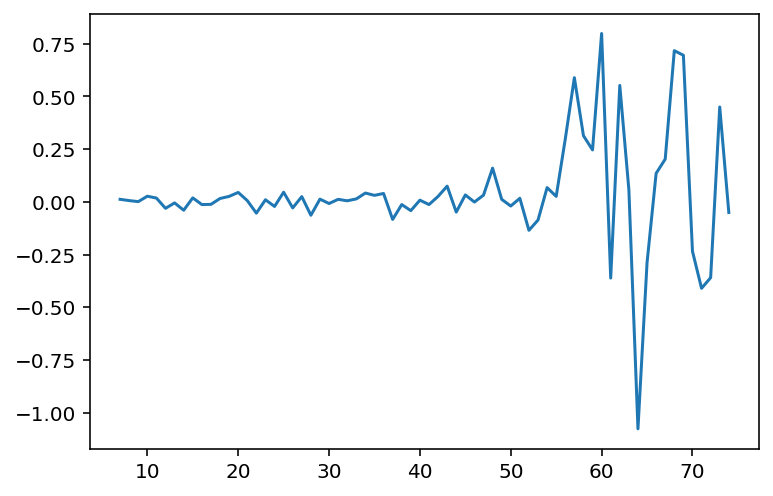

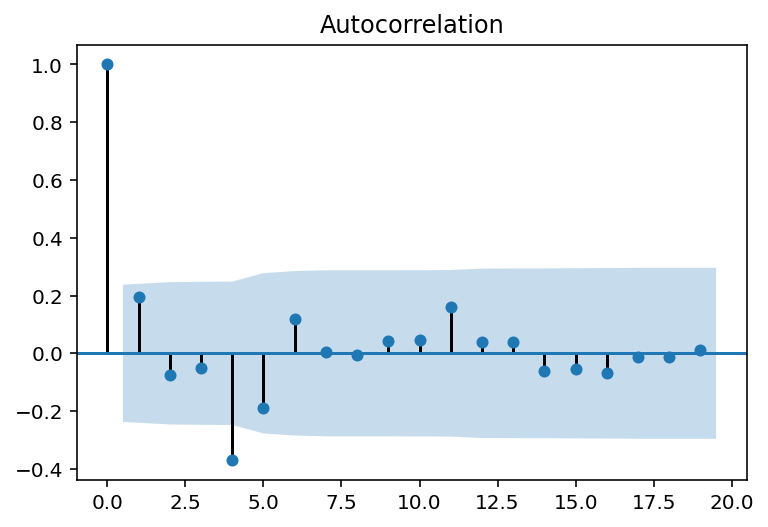

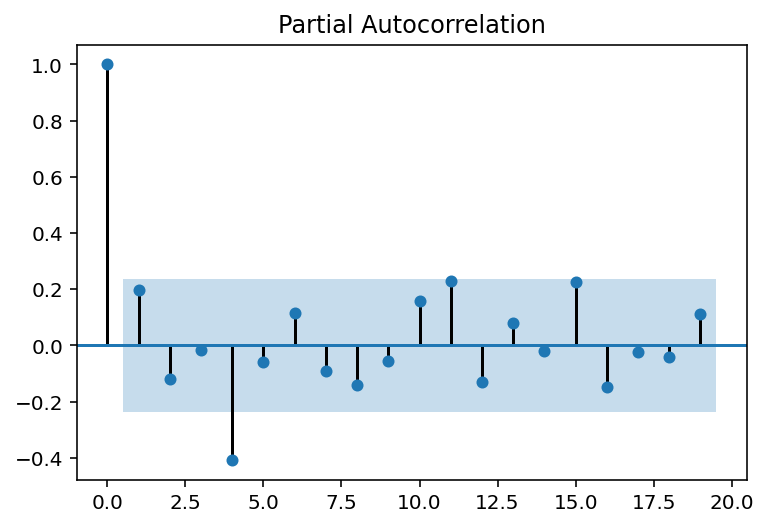

In [18]:
diff_jeju_cha = travel_df['제주차박'].diff(periods=1).iloc[1:]
diff_jeju_cha.plot()
plot_acf(diff_jeju_cha)
plot_pacf(diff_jeju_cha)


                               SARIMAX Results                                
Dep. Variable:                   제주차박   No. Observations:                   69
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -12.644
Date:                Thu, 14 Oct 2021   AIC                             33.289
Time:                        15:12:52   BIC                             42.108
Sample:                             0   HQIC                            36.778
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8014      0.162     -4.945      0.000      -1.119      -0.484
ar.L2         -0.4564      0.079     -5.780      0.000      -0.611      -0.302
ma.L1          0.4233      0.167      2.536      0.0

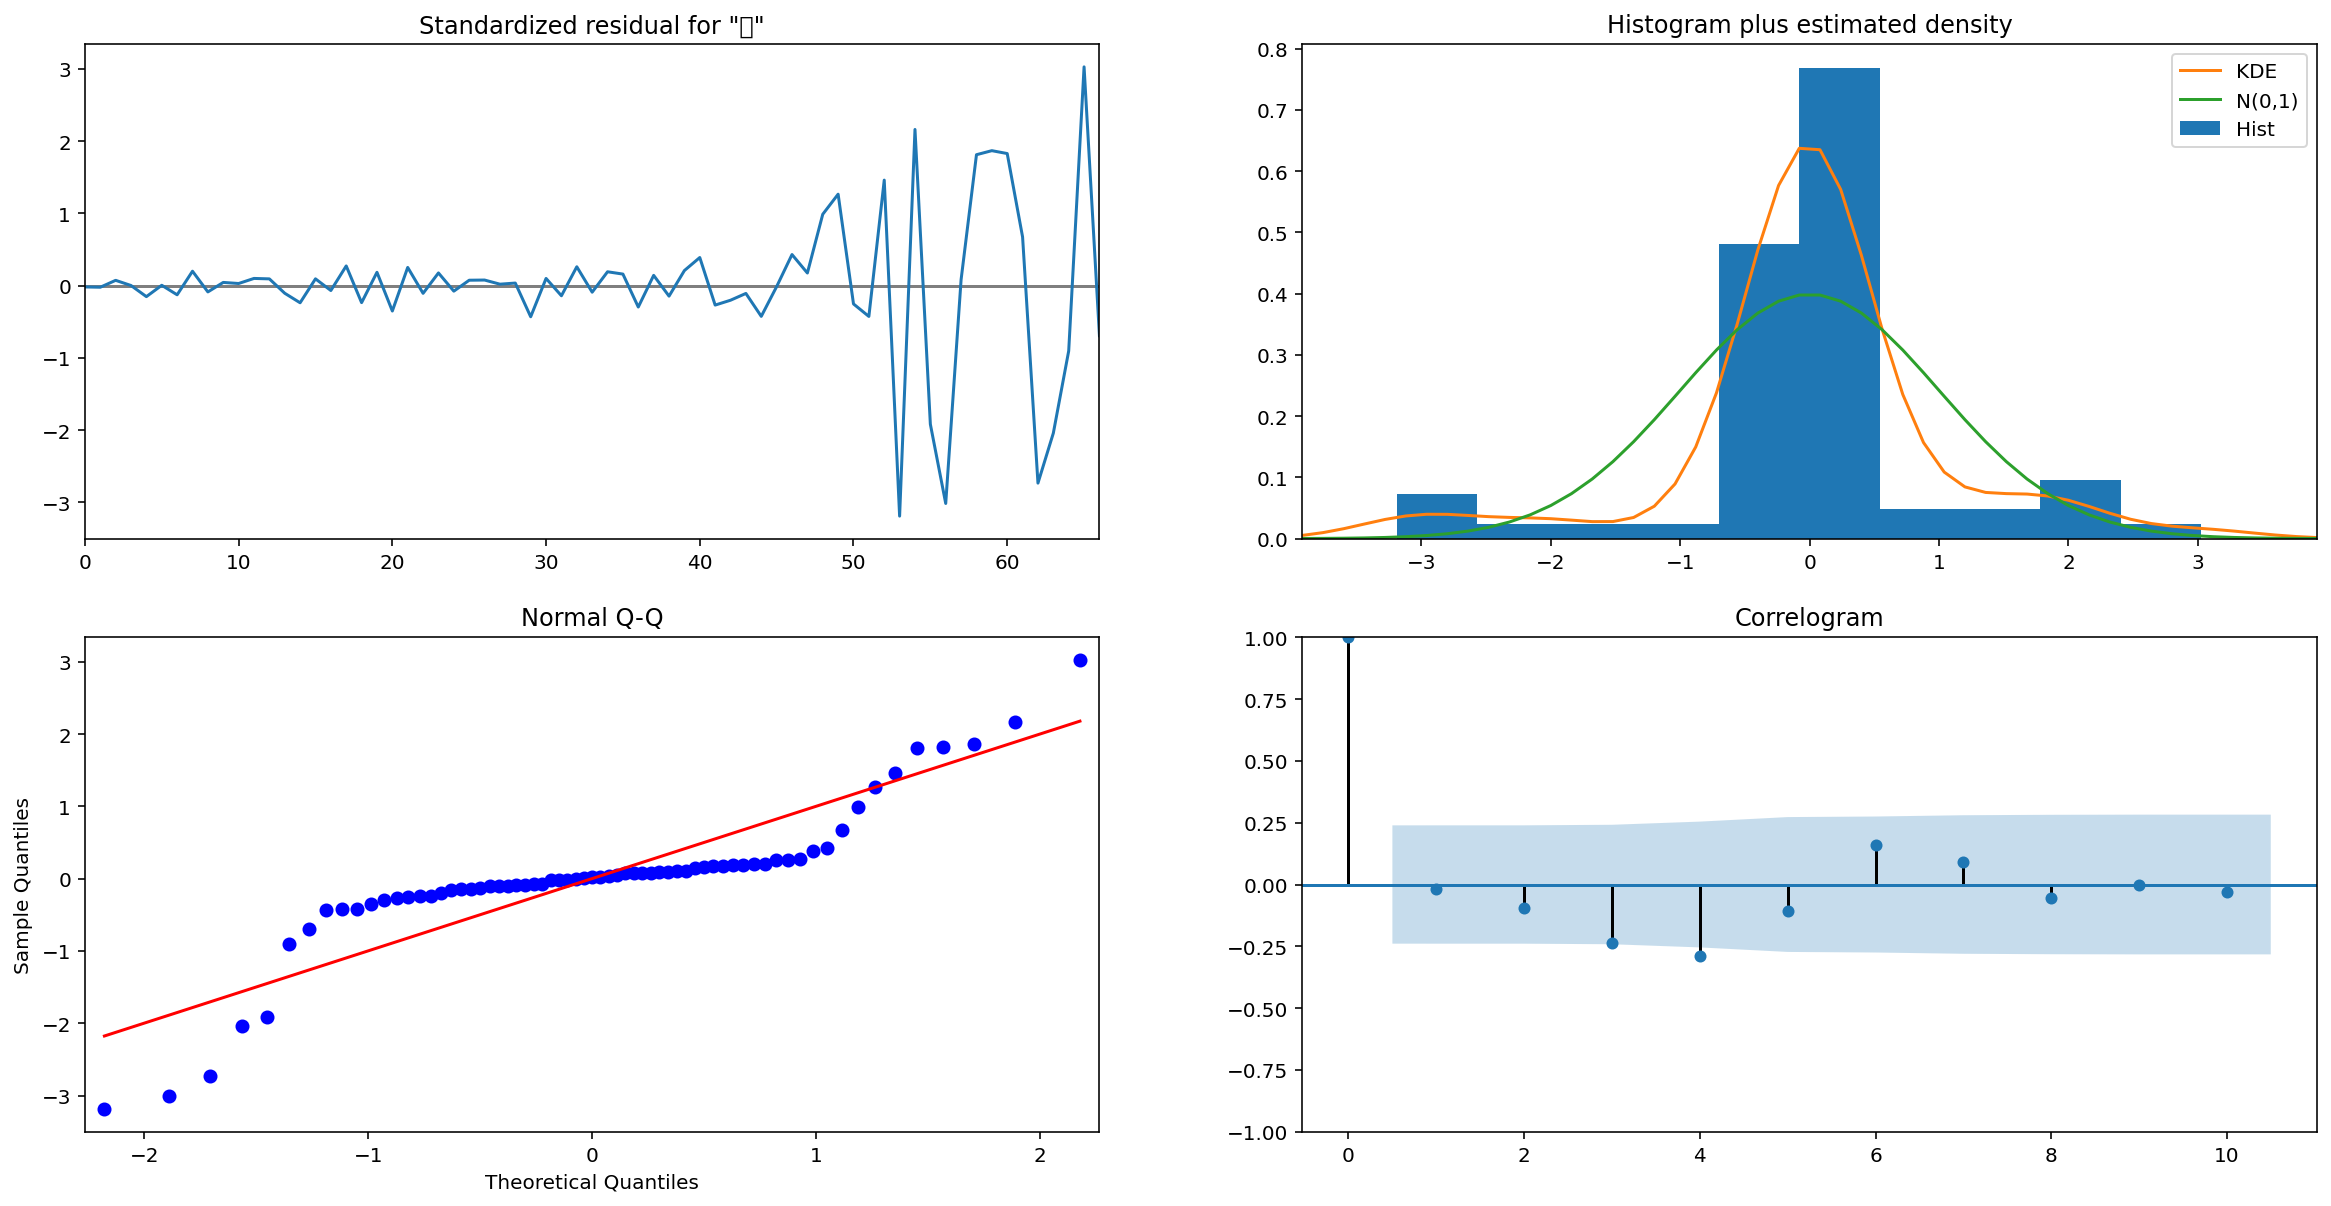

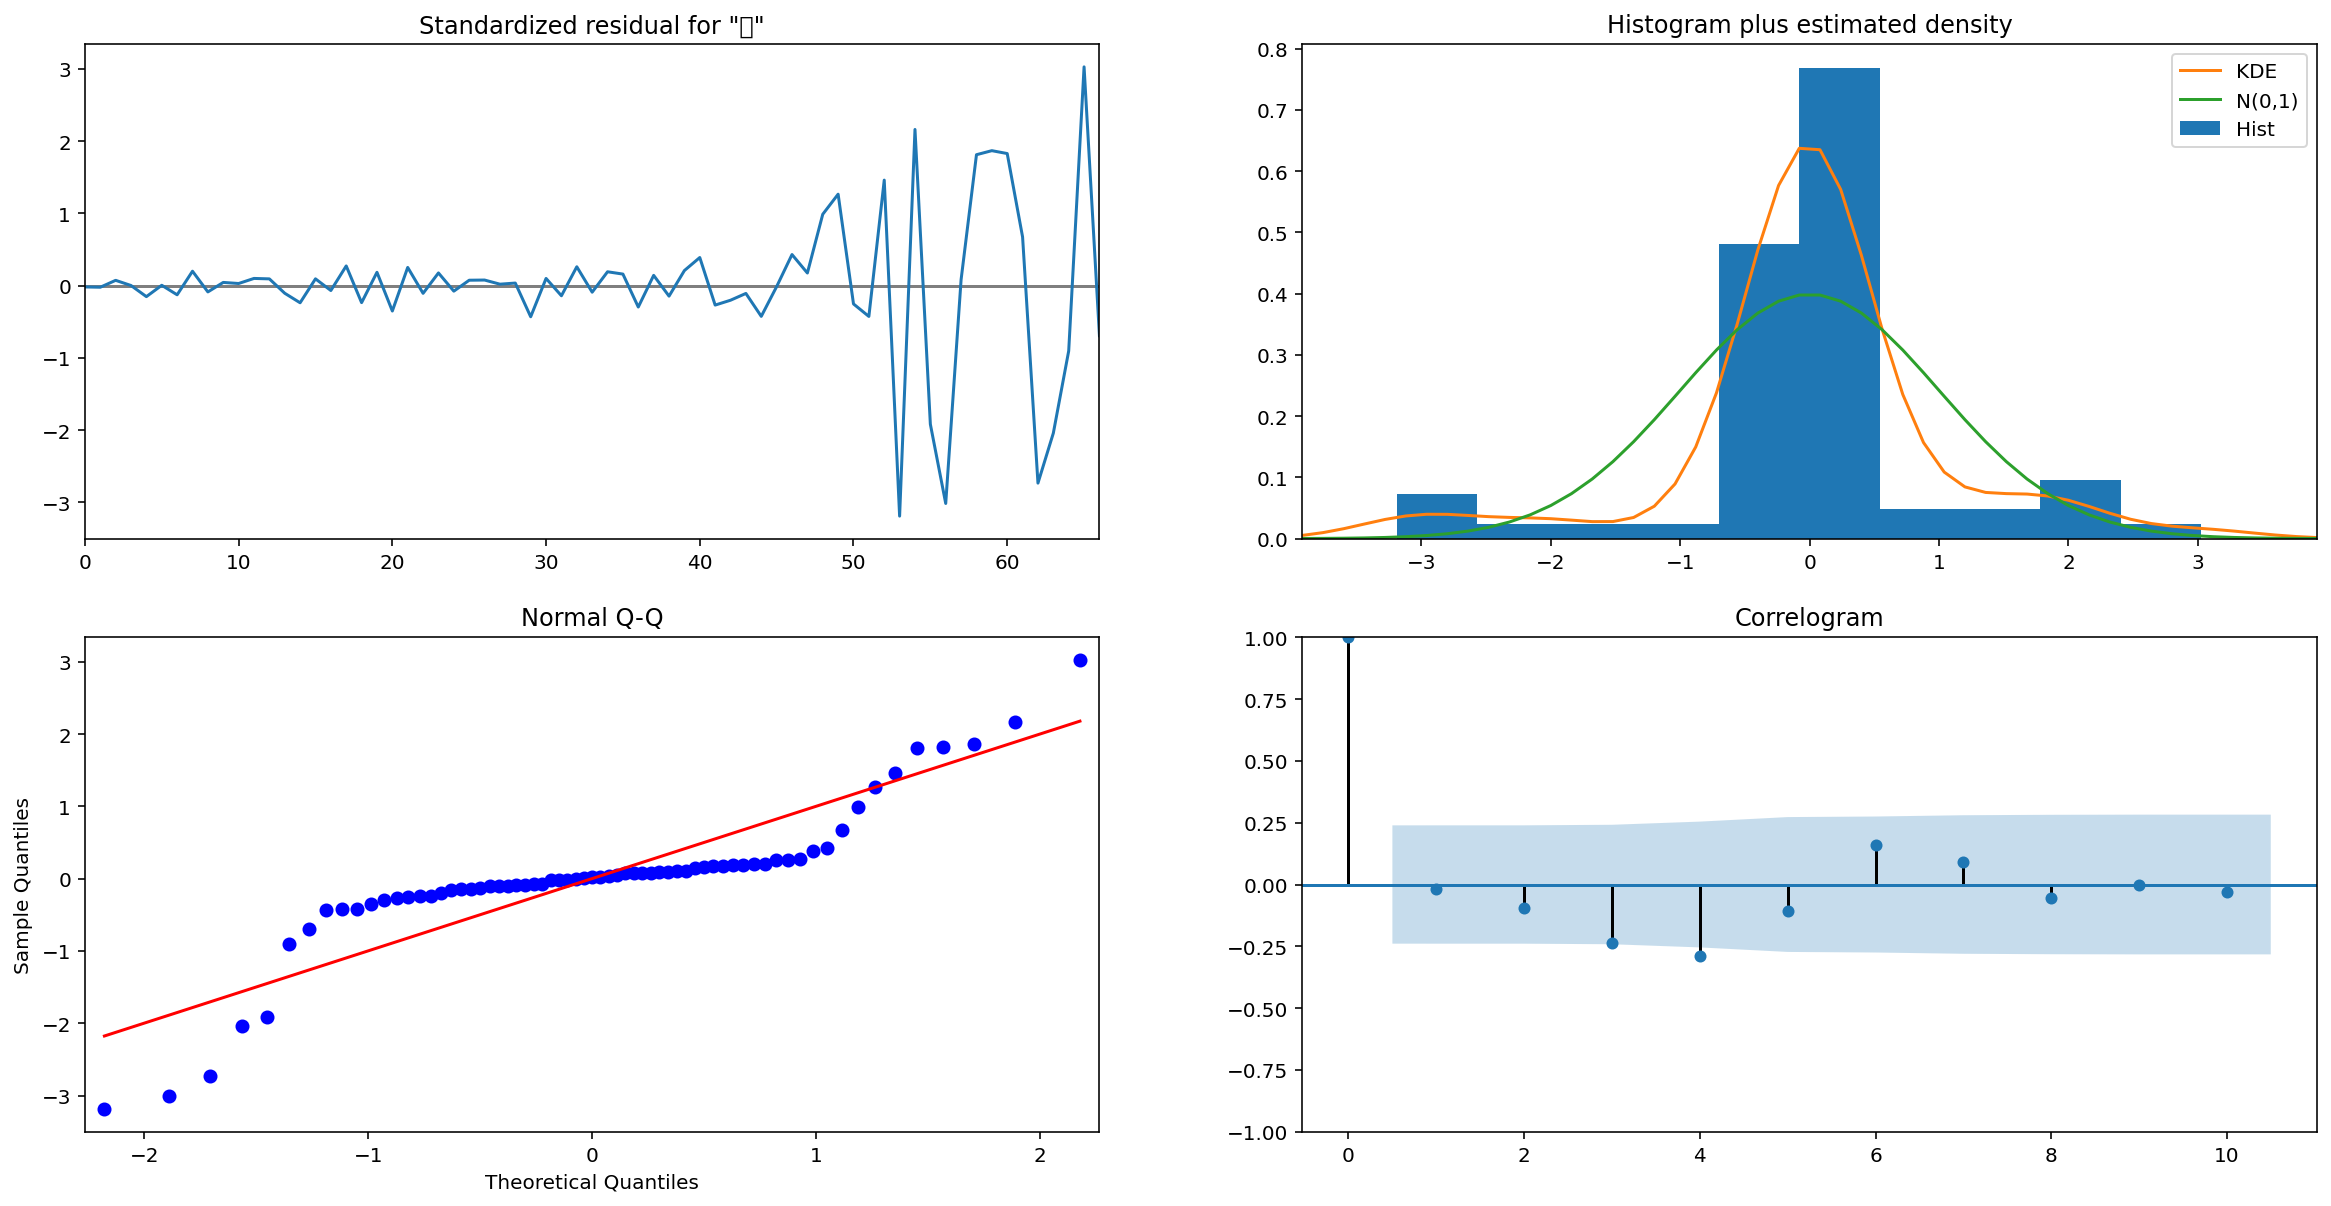

In [21]:
ARIMA_MODEL = ARIMA(travel_df['제주차박'], order = (2,2,1))

# ARIMA_MODEL.fit(trend)
ARIMA_MODEL_FIT = ARIMA_MODEL.fit()
# ARIMA_MODEL_FIT = ARIMA_MODEL.fit(trend = 'nc', full_output = True, disp = True)
print(ARIMA_MODEL_FIT.summary())    
# ARIMA_MODEL_FIT.plot_predict()
ARIMA_MODEL_FIT.plot_diagnostics(figsize=(20, 10))

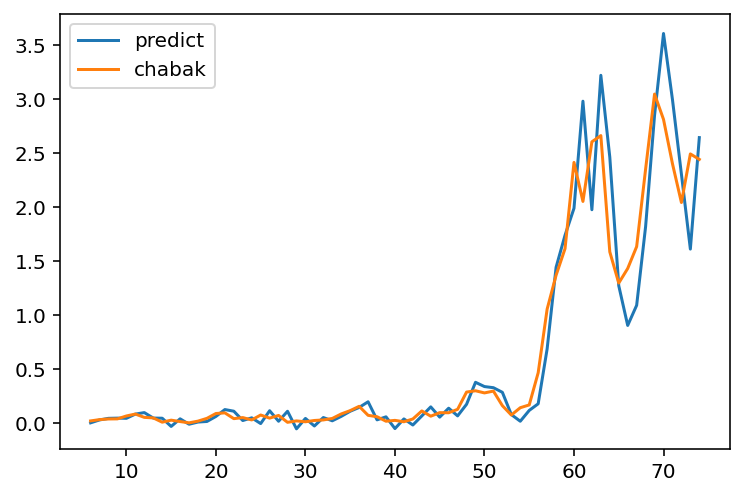

In [22]:
plt.plot(ARIMA_MODEL_FIT.predict(), label = 'predict')
plt.plot(travel_df['제주차박'], label = 'chabak')
plt.legend()
plt.show()

In [24]:
FORECAST_RESULT = ARIMA_MODEL_FIT.forecast(steps=120)


In [25]:
FORECAST_RESULT

75    2 
76    3 
77    2 
78    2 
79    3 
      ..
190   6 
191   6 
192   6 
193   6 
194   6 
Name: predicted_mean, Length: 120, dtype: float64